In [1]:
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

In [2]:
list_file="../data/sp_gene_list_dir/Final_list_for_DESeq_extr_numbered_1_cut.txt"
#list_file="../data/sp_gene_list_dir/Final_list_for_DESeq_extr_numbered.txt"

In [3]:
#bring in genes name to gene identifier mapping
gene_dict={}
for line in open(list_file,"r"):
    gene_dict[line.split("\t")[0]]=line.split("\t")[1].split("\n")[0]
#add any additional genes from sorghum annotation
gene_dict["Sobic.003G236800.1"]="BASS2"
#gene_dict["Sobic.005G125400.1"] = "DIC.1"
#gene_dict["Sobic.009G081700.2"] = "DIC.2"
#gene_dict["Sobic.007G037600.1"] = "DIC.3"
gene_dict

{'Sobic.001G065600.1': 'Z-PR.7',
 'Sobic.004G001300.1': 'Z-PR.6',
 'Sobic.006G220800.1': 'Z-PR.4',
 'Sobic.002G006600.1': 'Z-PR.1',
 'Sobic.009G088200.1': 'TPT',
 'Sobic.003G072300.2': 'TPI.2',
 'Sobic.002G277100.1': 'TPI.1',
 'Sobic.009G062800.1': 'TKL.3',
 'Sobic.001G097100.3': 'SHMT',
 'Sobic.003G359100.1': 'SBP',
 'Sobic.002G051100.1': 'RPI.2',
 'Sobic.001G491000.1': 'RPE',
 'Sobic.005G231500.1': 'RBCSACT',
 'Sobic.005G042000.1': 'RBCS',
 'Sobic.004G272100.1': 'PRK',
 'Sobic.004G311100.1': 'PPa6',
 'Sobic.009G016000.1': 'PPa4',
 'Sobic.003G002300.1': 'PPT.2',
 'Sobic.003G050800.1': 'PPT.1',
 'Sobic.009G132900.1': 'PPDK',
 'Sobic.004G070800.1': 'PIC.3',
 'Sobic.004G310300.1': 'PIC.2',
 'Sobic.009G183700.1': 'PGK.1',
 'Sobic.010G160700.1': 'PEPC.4',
 'Sobic.004G106900.1': 'PEPC.2',
 'Sobic.002G390500.1': 'PDK.2',
 'Sobic.001G432800.1': 'PCK',
 'Sobic.008G112300.1': 'OMT1',
 'Sobic.002G141900.1': 'NHD',
 'Sobic.003G036200.1': 'NADP-ME.4',
 'Sobic.009G108700.1': 'NADP-ME.2',
 'Sobic.00

In [4]:
#bring in TPM values
trans_dict={}
exp_files=[x for x in os.listdir("../data/express_output/") if x[-5:]==".xprs"]
for file in exp_files:
    TPM_dict={}
    sample=file[:-13]
    tmp = pd.read_csv("../data/express_output/"+file, delimiter="\t", index_col=1)["tpm"]
    tmp = tmp.loc[gene_dict.keys()]
    tmp.rename(index=gene_dict, inplace=True)
    trans_dict[sample]=tmp.to_dict()
#print trans_dict

In [5]:
#create compiled dataframe and save to file
final_TPM_list = pd.DataFrame(trans_dict)
final_TPM_list.index.name = "gene"
final_TPM_list.to_csv("../data/simple_ms_bs_fig/Final_list_for_DESeq2_extr_numbered_1_cut"+"_all_TPM.txt", sep="\t")

In [6]:
###CREATE Plots for figure###

In [7]:
def generate_MS_BS_lists(genes, final_TPM_list):
    TPM_list = final_TPM_list.copy()
    TPM_list["gene_name"] = TPM_list.index.to_series().str.split(".", expand=True)[0]
    order = {}
    for x in range(0, len(genes)):
         order[genes[x]]=x
    genes = TPM_list[TPM_list["gene_name"].isin(genes)].copy()
    genes["order"] = genes[["gene_name"]].replace(order)["gene_name"].to_list()
    genes = genes.sort_values("order")
    genes = genes.index.tolist()
    return genes

In [8]:
#genes desired in plot and in order desired
MS_genes = ["CA","PEPC", "ASP-AT","DIT1","NADP-MDH", "Ala-AT",'BASS2','NHD', "PPDK","PPT"] #'OMT1'
MS_genes = generate_MS_BS_lists(MS_genes, final_TPM_list)
BS_genes = ["ASP-AT",'DIC', "PCK", "NADP-ME", "NAD-MDH","NAD-ME","Ala-AT","RBCS","RBCSACT"]
BS_genes = generate_MS_BS_lists(BS_genes, final_TPM_list)

In [9]:
#prepare list for subdeviding easily
final_TPM_list = final_TPM_list.T
sample_labels = final_TPM_list.index.to_series().str.split("_", expand=True)
final_TPM_list["species"] = sample_labels[0]+"_"+sample_labels[1]
final_TPM_list["cell_type"] = sample_labels[2]
final_TPM_list["rep"] = sample_labels[3]

In [10]:
final_TPM_list

gene                      Z-PR.7     Z-PR.6      Z-PR.4     Z-PR.1        TPT  \
D_eriantha_BS_JB       256.39190   321.2261   260.47810   801.9548  33.528890   
D_eriantha_BS_JW       262.03890   326.8931   271.77340   754.7493  32.027710   
D_eriantha_BS_SK       239.56990   301.2609   260.08050   691.4497  32.123280   
D_eriantha_MS_JB        96.22398   209.2530    16.72112   196.2518  28.283690   
D_eriantha_MS_JW        95.07903   247.2601    12.58824   245.9081  30.088870   
D_eriantha_MS_SK        95.25016   204.7074    34.85458   232.4595  30.203470   
P_hallii_BS_JB         824.48080   234.3799  1239.67000   493.7207   0.764569   
P_hallii_BS_JW         850.35880   276.1495  1288.02300   509.9177   0.753647   
P_hallii_BS_SK         799.80920   271.9885  1288.59500   534.5275   0.381683   
P_hallii_MS_JB          69.23269   135.3434    48.12791   202.5670   1.073892   
P_hallii_MS_JW          58.58639   158.4038    55.20151   252.6279   1.270024   
P_hallii_MS_SK          52.67936   118.4152    48.74851   179.6048   0.759964   
S_italica_BS_JB       1079.54900   225.9612   696.13610   628.5515   1.162030   
S_italica_BS_JW       1134.09500   233.5621   730.44690   660.1887   1.922797   
S_italica_BS_SK       1123.68200   229.1584   794.99550   690.9101   1.754412   
S_italica_MS_JB        579.46310   263.0516    17.36832   283.9951   0.597828   
S_italica_MS_JW        594.84970   263.1291    13.84651   313.7149   2.324333   
S_italica_MS_SK        647.85590   309.5257    19.91985   314.3370   2.014882   
S_vilivoides_BS_JB     168.45370   131.7017    90.55170   113.0727   5.151360   
S_vilivoides_BS_JW     522.07080   333.5412   166.40240   335.3827   6.126146   
S_vilivoides_BS_SK     794.67210   506.1453   267.00110   452.8128   8.139421   
S_vilivoides_WL_rep1  2096.14300  1183.9120   460.06550  1023.3970  14.468860   
S_vilivoides_WL_rep2  2086.21700  1274.4470   538.36390  1108.7630  14.029490   
S_vilivoides_WL_rep3  2132.90400  1175.0120   476.18410   983.1549  16.304110   
U_fusca_BS_JB          511.24910   967.1240   202.43590   945.2491   1.683198   
U_fusca_BS_JW          420.55710   748.2388   185.58540   708.5247   4.497413   
U_fusca_BS_SK          422.56300   852.4966   163.80950   762.2966   1.496294   
U_fusca_MS_JB          283.62910   462.9294    92.88812   464.3487   2.215155   
U_fusca_MS_JW          240.76210   457.5848    64.28228   319.5662   3.371736   
U_fusca_MS_SK          272.62290   461.6397    68.67814   398.7234   1.505158   

gene                       TPI.2      TPI.1       TKL.3         SHMT  \
D_eriantha_BS_JB       487.05800   170.0462   831.71360  1120.206000   
D_eriantha_BS_JW       512.64120   195.2707   872.44250  1180.331000   
D_eriantha_BS_SK       506.64090   111.9717   783.49970  1093.535000   
D_eriantha_MS_JB       241.66370   524.3905    78.89444    44.751630   
D_eriantha_MS_JW       235.60620   926.2370    60.54794    15.391520   
D_eriantha_MS_SK       254.04570   672.0440   123.17460   109.478300   
P_hallii_BS_JB         217.84080   370.1318  1155.53900   827.682900   
P_hallii_BS_JW         212.61830   398.6858  1213.37900   849.411000   
P_hallii_BS_SK         210.57430   453.1094  1272.26500   897.965500   
P_hallii_MS_JB          30.63753  3488.3650    44.88452    19.136230   
P_hallii_MS_JW          25.49456  3911.9370    39.11318    14.939550   
P_hallii_MS_SK          34.62467  3237.6550    46.90468    18.903310   
S_italica_BS_JB        662.59290   245.5914  1113.68500   561.742300   
S_italica_BS_JW        663.26210   272.9295  1057.22200   551.222800   
S_italica_BS_SK        664.51160   295.0568  1125.12000   544.776700   
S_italica_MS_JB        148.68730  1831.4500    42.36058     8.903957   
S_italica_MS_JW        115.06280  2008.2150    38.30525     8.366178   
S_italica_MS_SK        128.83560  2256.1000    33.66721    11.243560   
S_vilivoides_BS_JB    1633.47000   312.9734   151.29530   253.527900   
S_vilivoides_BS_JW    1540.87600   376.1459   26

In [11]:
def get_colors(main_colors, sng_sp_Ctype_stats):
    main_colors = pd.DataFrame(main_colors)#.from_dict(main_colors, orient='index').reset_index()
    main_colors.columns = ["enzyme", "color"]

    colors = pd.DataFrame(sng_sp_Ctype_stats.columns.tolist(), columns=["dup_names"])
    colors["enzyme"] = colors["dup_names"].str.split(".", expand=True)[0]
    colors = pd.merge(main_colors, colors, on="enzyme", how="right")
    colors.fillna('0.8', inplace=True)
    colors.index = colors["dup_names"]
    colors = colors["color"].to_dict()
    return colors

In [12]:
def bar_plot_tpms(sng_sp_Ctype_stats, title, colors, figsize=(10,5)):
    #assign_colors
    for gene in [x for x in sng_sp_Ctype_stats.columns if x not in colors.keys()]:
        colors[gene]="gray"
    c = sng_sp_Ctype_stats.columns.to_series().apply(lambda x: colors[x])
    
    plt.rcParams.update({'font.size': 22})
    fig, ax = plt.subplots(figsize=figsize)
    ax.patch.set_alpha(0) #make back of plot transparent
    plt.bar(x=sng_sp_Ctype_stats.loc["mean"].index, height=sng_sp_Ctype_stats.loc["mean"]/1000,
            yerr=sng_sp_Ctype_stats.loc["stderr"]/1000, color=c, edgecolor = "black", capsize=6)
    plt.ylabel("TPM x 1,000")
    plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
    plt.title(title)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    #ax.spines["bottom"].set_visible(False)
    ax.margins(0.01, 0.03)
    plt.xticks(rotation = 90)
    plt.tick_params(axis='x', bottom=False, top=False)
    #plt.box(on=None)
    plt.show()

S_italica BS


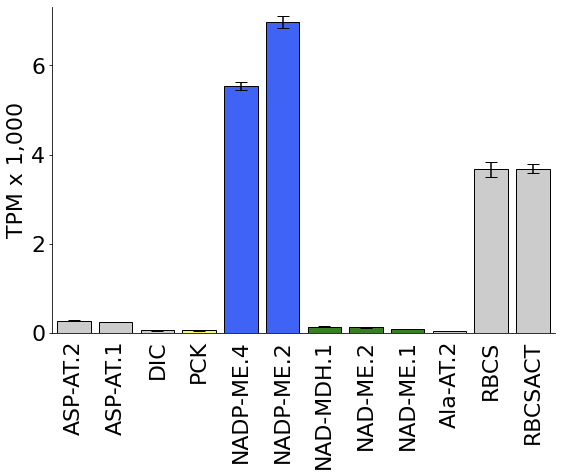

S_italica MS


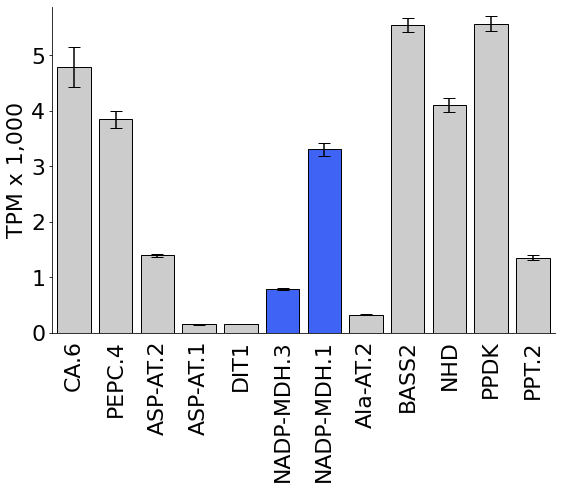

U_fusca BS


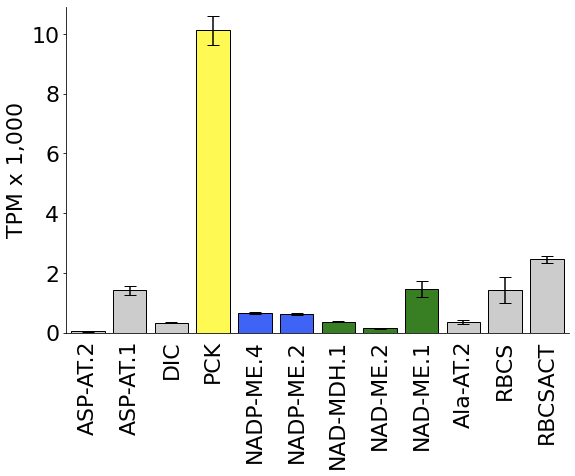

U_fusca MS


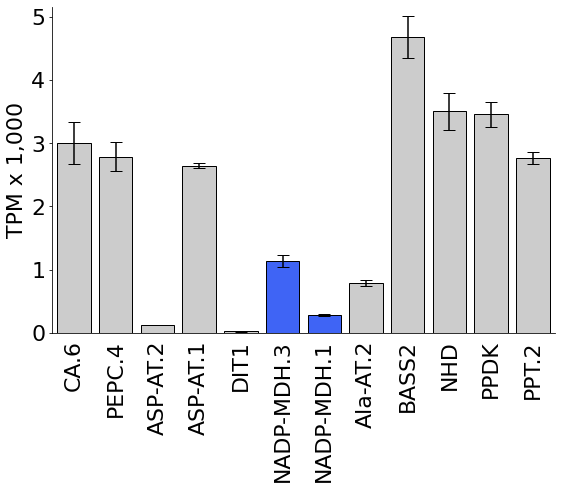

P_hallii BS


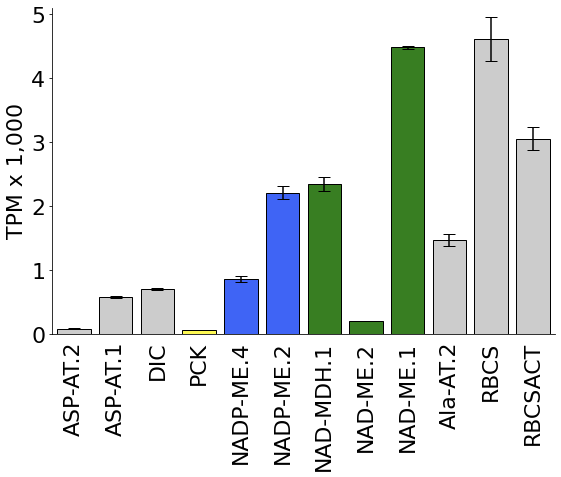

P_hallii MS


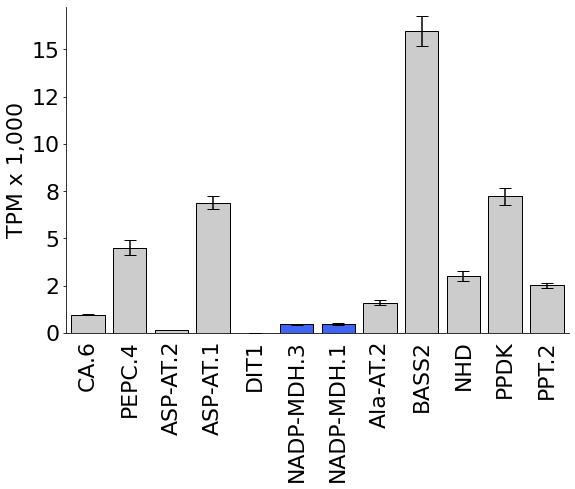

D_eriantha BS


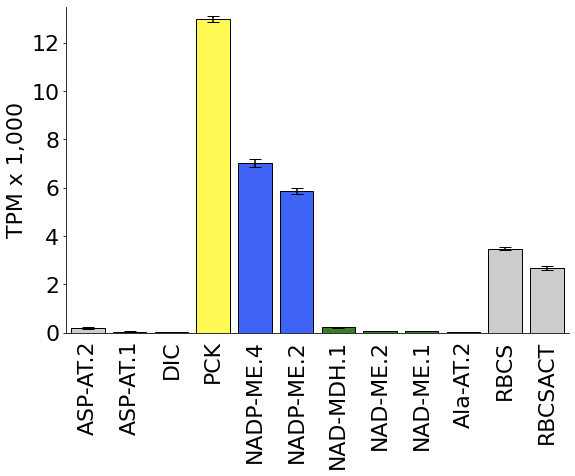

D_eriantha MS


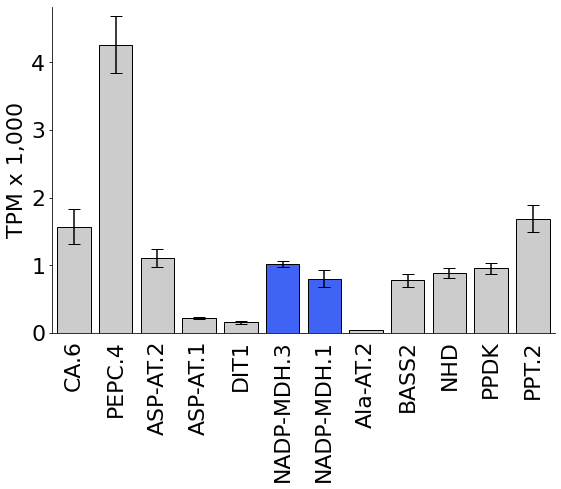

S_vilivoides BS


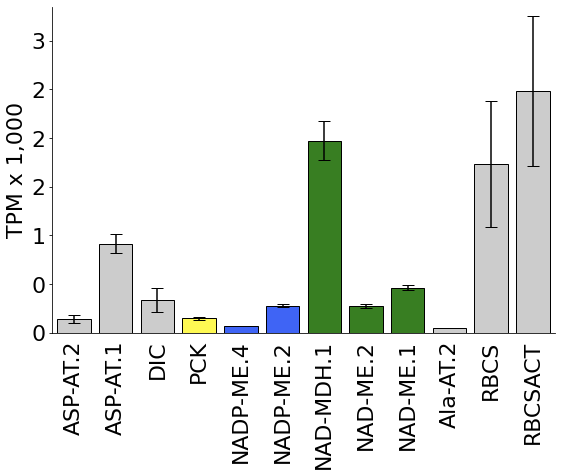

S_vilivoides WL


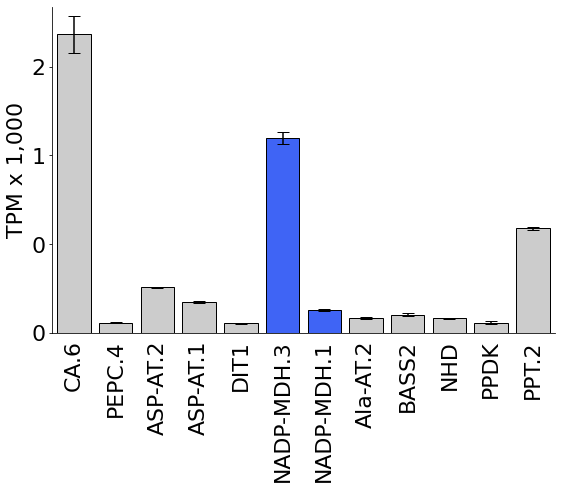

In [13]:
exclude = ["DiT2", "PPT.1", "Ala-AT.1", "PEPC.2"]

#go through species and cell type and create plots
#for species in final_TPM_list["species"].unique():
for species in ['S_italica', 'U_fusca', 'P_hallii', 'D_eriantha','S_vilivoides']:
    for cell_type in final_TPM_list[final_TPM_list["species"] == species]["cell_type"].unique():
    #for cell_type in ["MS","BS"]:   
        
        #create frame with single species and cell type
        sng_sp_cell_type = final_TPM_list[(final_TPM_list["species"]==species) & (final_TPM_list["cell_type"]==cell_type)].copy()
        
        #filter and order genes based on list
        if sng_sp_cell_type["cell_type"].unique()[0] == "MS":
            sng_sp_cell_type = sng_sp_cell_type[["species","cell_type","rep"] + 
                                                [x for x in MS_genes if x in sng_sp_cell_type.columns]]
        elif sng_sp_cell_type["cell_type"].unique()[0] == "BS":
            sng_sp_cell_type = sng_sp_cell_type[["species","cell_type","rep"] + 
                                                [x for x in BS_genes if x in sng_sp_cell_type.columns]]
        elif sng_sp_cell_type["cell_type"].unique()[0] == "WL":
            sng_sp_cell_type = sng_sp_cell_type[["species","cell_type","rep"] + 
                                                [x for x in MS_genes if x in sng_sp_cell_type.columns]]
        
        #calculate mean, std, stderror
        sng_sp_Ctype_stats = pd.DataFrame([sng_sp_cell_type.mean(), sng_sp_cell_type.std(),
                                           sng_sp_cell_type.count(numeric_only=True)], index=["mean", "std", "n"])
        sng_sp_Ctype_stats.loc["stderr"] = sng_sp_Ctype_stats.loc["std"]/np.sqrt(sng_sp_Ctype_stats.loc["n"])
        sng_sp_Ctype_stats.columns.name=""
        #exlude any that are not useful
        sng_sp_Ctype_stats = sng_sp_Ctype_stats[[x for x in sng_sp_Ctype_stats.columns if x not in exclude]]
        
        #create plots
        main_colors = [["NADP-MDH", (63/256,100/256,246/256)], 
                       ["NADP-ME", (63/256,100/256,246/256)], 
                       ["PCK", (255/256,250/256,83/256)],
                       ["NAD-ME", (56/256,126/256,34/256)],
                       ["NAD-MDH", (56/256,126/256,34/256)]]
        colors = get_colors(main_colors, sng_sp_Ctype_stats)
        print(species, cell_type)    
        #bar_plot_tpms(sng_sp_Ctype_stats, title=species+" "+cell_type, colors=colors, figsize=(9,6))
        bar_plot_tpms(sng_sp_Ctype_stats, title="", colors=colors, figsize=(9,6))

In [14]:
def get_sng_cell_data_stats(species, cell_type, final_TPM_list, MS_genes, BS_genes, exclude, filter_cell_type=True):
    #create frame with single species and cell type
    sng_sp_cell_type = final_TPM_list[(final_TPM_list["species"]==species) & (final_TPM_list["cell_type"]==cell_type)].copy()
    
    if filter_cell_type:
        #filter and order genes based on list
        if sng_sp_cell_type["cell_type"].unique()[0] == "MS":
            sng_sp_cell_type = sng_sp_cell_type[["species","cell_type","rep"] + 
                                                    [x for x in MS_genes if x in sng_sp_cell_type.columns]]
        elif sng_sp_cell_type["cell_type"].unique()[0] == "BS":
            sng_sp_cell_type = sng_sp_cell_type[["species","cell_type","rep"] + 
                                                    [x for x in BS_genes if x in sng_sp_cell_type.columns]]
        elif sng_sp_cell_type["cell_type"].unique()[0] == "WL":
            sng_sp_cell_type = sng_sp_cell_type[["species","cell_type","rep"] + 
                                                    [x for x in MS_genes if x in sng_sp_cell_type.columns]]
    else:
        sng_sp_cell_type = sng_sp_cell_type[["species","cell_type","rep"] + 
                                                    [x for x in MS_genes+[z for z in BS_genes if z not in MS_genes] if x in sng_sp_cell_type.columns]]
        
    #calculate mean, std, stderror
    sng_sp_Ctype_stats = pd.DataFrame([sng_sp_cell_type.mean(), sng_sp_cell_type.std(),
                                       sng_sp_cell_type.count(numeric_only=True)], index=["mean", "std", "n"])
    sng_sp_Ctype_stats.loc["stderr"] = sng_sp_Ctype_stats.loc["std"]/np.sqrt(sng_sp_Ctype_stats.loc["n"])
    sng_sp_Ctype_stats.columns.name=""
    #exlude any that are not useful
    sng_sp_Ctype_stats = sng_sp_Ctype_stats[[x for x in sng_sp_Ctype_stats.columns if x not in exclude]]
    
    #create plots
    main_colors = [["NADP-MDH", (63/256,100/256,246/256)], 
                       ["NADP-ME", (63/256,100/256,246/256)], 
                       ["PCK", (255/256,250/256,83/256)],
                       ["NAD-ME", (56/256,126/256,34/256)],
                       ["NAD-MDH", (56/256,126/256,34/256)]]
    colors = get_colors(main_colors, sng_sp_Ctype_stats)
    
    return sng_sp_Ctype_stats, sng_sp_cell_type, colors

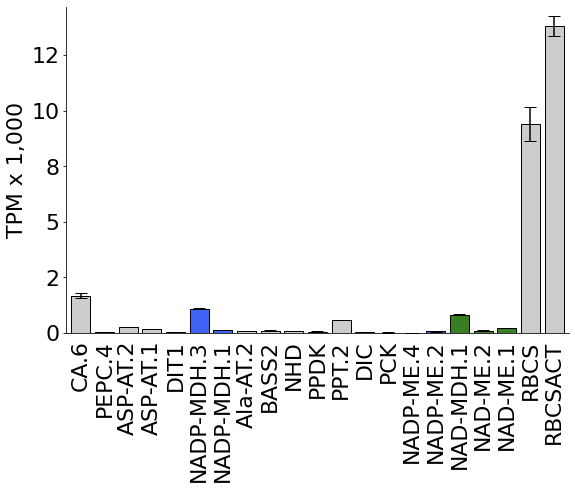

In [15]:
#play with S. indica
species = 'S_vilivoides'
cell_type = "WL"
WL_sng_sp_cell_type_stats, WL_sng_sp_cell_type, colors = get_sng_cell_data_stats(species, cell_type, final_TPM_list,
                                                                         MS_genes, BS_genes, exclude, filter_cell_type=False)
bar_plot_tpms(WL_sng_sp_cell_type_stats, title="", colors=colors, figsize=(9,6))

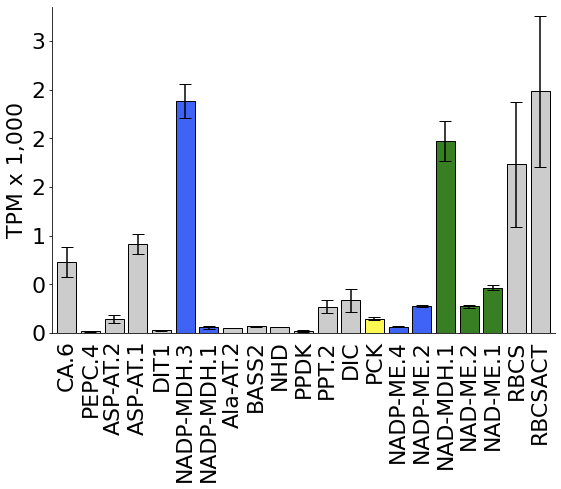

In [16]:
species = 'S_vilivoides'
cell_type = "BS"
BS_sng_sp_cell_type_stats, BS_sng_sp_cell_type, colors = get_sng_cell_data_stats(species, cell_type, final_TPM_list,
                                                                         MS_genes, BS_genes, exclude, filter_cell_type=False)
bar_plot_tpms(BS_sng_sp_cell_type_stats, title="", colors=colors, figsize=(9,6))